<center><font size="6">FASHION MNIST: MANERA DE IMPLEMENTARLO CON UNA RED NEURONAL CONVOLUCIONAL</font></center>

In [17]:
import pandas as pd

trainData = pd.read_csv('fashion-mnist_train.csv')       
testData = pd.read_csv('fashion-mnist_test.csv')  

# 1. CONJUNTO DE DATOS

<br>
    
Nuestro conjunto de datos esta formado por 70.000 imágenes, el cual está dividido en dos subconjuntos:  __train__ y __test__. Los conjuntos de datos tienen las siguientes características:
 * __Train:__ Se utilizará para entrenar el modelo. Este set contiene el 85% de todas las imagenes, es decir, un total de 60.000 imágenes donde cada una esta formada por 784 píxeles.
 * __Test:__ Se utilizará para probar el modelo. Este set contiene el 15% de todas las imagenes, es decir, un total de 10.000 imágenes donde cada una esta formada por 784 píxeles.
<br>


## 1.1 Categorias de los datos

 |   Índice    |        Categoria          |
 |-------------|---------------------------|
 |      0      |      Camiseta / top       |    
 |      1      |        Pantalón           |
 |      2      |         Jersey            |
 |      3      |        Vestido            |
 |      4      |        Abrigo             |
 |      5      |       Sandalia            |
 |      6      |        Camisa             |
 |      7      |  Zapatilla de deporte     |
 |      8      |        Bolsa              |
 |      9      |        Botín              |


<br>

# QUICK VIEW DE LOS DATOS

Lo primero que debemos hacer es vizualizar las dimensiones del dataset:

In [18]:
print('\t Filas,  Columnas', )
print('Train:\t', trainData.shape)
print('Test:\t', testData.shape)

	 Filas,  Columnas
Train:	 (60000, 785)
Test:	 (10000, 785)


Hay que verificar si hay datos faltantes en el dataset:


In [19]:
def verificar_nulos(data):
  if data.isnull().any().any() == False:
    return print('Los datos NO CONTIENEN VALORES NULOS')
  else:
    return print('Los datos SI CONTIENEN VALORES NULOS')

verificar_nulos(trainData)
verificar_nulos(testData)

Los datos NO CONTIENEN VALORES NULOS
Los datos NO CONTIENEN VALORES NULOS


# 2. Distribucion por clases
No menos importante es visualizar la matriz de datos, pues nos es imprescindible para manejarlos y saber con cual de las columnas asociar las etiquetas. Para ello, mostramos las 3 primeras y últimas filas del data set Train (idem por el test):

In [23]:
trainData.head(4).append(trainData.tail(3))

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Como se observa la primera columna nos indica que tipo de prenda es, por lo cual crearemos un diccionario referenciando hacia que tipo de prenda hace referencia el numero.

Por siguiente añadiremos el dato cualitativo al dataset.

In [24]:
labels = {  0: "Camiseta",
            1: "Pantalon",
            2: "Jersey",
            3: "Vestido",
            4: "Abrigo",
            5: "Sandalia",
            6: "Camisa",
            7: "Zapatilla de deporte",
            8: "Bolsa",
            9: "Botines" 
}

n_cat = len(labels)

def add_column_from_dict(data, col, new_col, dict_):
    data[new_col] = data[col].map(dict_)
    return data

add_column_from_dict(trainData, 'label', 'labelName', labels)
add_column_from_dict(testData, 'label', 'labelName', labels)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,labelName
0,0,0,0,0,0,0,0,0,9,8,...,87,56,0,0,0,0,0,0,0,Camiseta
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pantalon
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,63,53,31,0,0,0,Jersey
3,2,0,0,0,0,0,0,0,0,0,...,126,140,0,133,224,222,56,0,0,Jersey
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Vestido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,23,14,20,0,0,1,0,0,0,Camiseta
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,2,52,23,28,0,0,0,Camisa
9997,8,0,0,0,0,0,0,0,0,0,...,172,172,182,199,222,42,0,1,0,Bolsa
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Bolsa


Veremos en un grafico como esta la distribucion de prendas de ropa segun el conjunto de los datos.

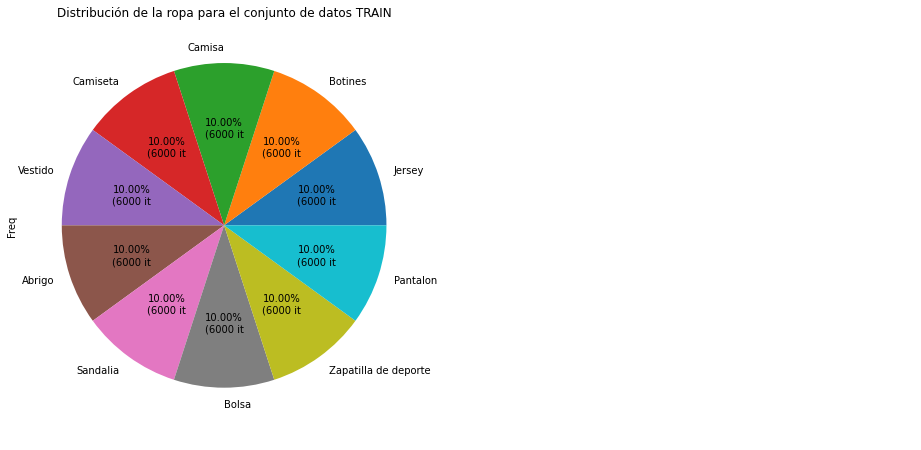

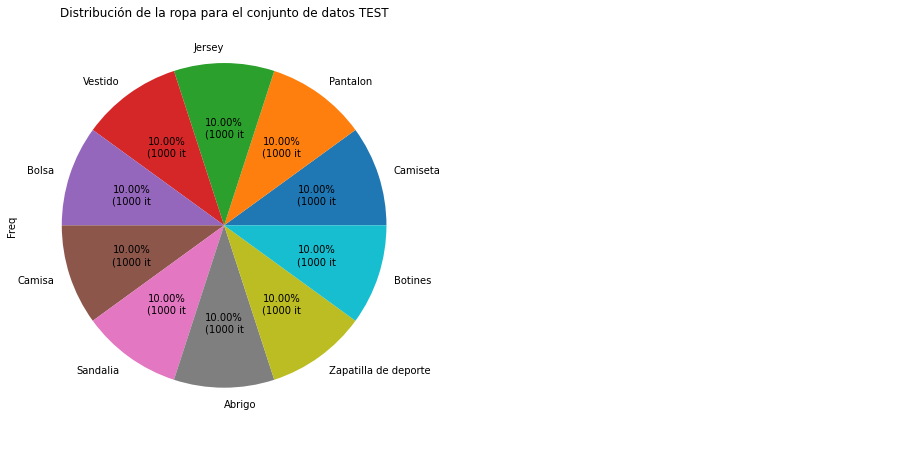

In [26]:
import matplotlib.pyplot as plt

def pie_plot(data, plotTitle):
    
    aux = data['labelName'].value_counts().to_frame('Freq')
    aux['labelName'] = aux.index 
    valores = aux['Freq']
    
    def pct_abs(values):
        def funct(pct):
            total = sum(values)
            val = int(round(pct * total / 100.0))
            return '{p:.2f}%\n({v:d} it'.format(p = pct,v = val)
        return funct


    plt.figure(figsize = (16,8))

    ax1 = plt.subplot(121, aspect = 'equal')
    aux.plot(kind = 'pie', 
             y = 'Freq', 
             ax = ax1,
             autopct = pct_abs(valores), 
             labels = aux['labelName'], 
             legend = False,
             title = plotTitle,
             fontsize = 10)

    # plot table
    ax2 = plt.subplot(122)
    plt.axis('off')
    plt.show()
    
    
plot1 = pie_plot(trainData,'Distribución de la ropa para el conjunto de datos TRAIN')
plot2 = pie_plot(testData, 'Distribución de la ropa para el conjunto de datos TEST')
plt.show()

# Visualizando la matriz como imagenes

Procedemos a crear una funcion que nos graficara la prenda seleccionando una fila de la matriz (1 fila = 1 prenda). Para ello, redimensionaremos la fila de pixeles (una fila = una imagen, es decir, un vector $ V = (v_1, v_2,..., v_n)$ donde $n = 784$) a una matriz de I $\in$ M$_{m,n}$, donde $m, n = 28$.

In [27]:
import numpy as np

def plot_image_sample(data, label_number, DataSetType, pf, pc):
    
    type_data = ('TRAIN' if DataSetType.lower().find("train") == label_number else 'TEST')
    
    # Obtenemos la etiqueta (diccionario)
    etiqueta = labels[label_number]
    # Eliminamos la primera columna (codigo etiqueta) y la última (nombre etiqueta)
    aux = data[data["label"] == label_number].sample(1)
    aux2 = aux.iloc[:, 1:-1]
    img = np.array(aux2).reshape(pf, pc)

    plt.imshow(img, cmap = 'gray')
    plt.grid(True)
    plot = plt.title('Ropa: ' + str(etiqueta) + '\nDatos: ' + str(type_data))
    

def matrix_image_sample(data, label_number, pf ,pc):
    
    pd.options.display.max_columns = None
    aux = data[data["label"] == label_number].sample(1)
    aux2 = aux.iloc[:, 1:-1]
    img = pd.DataFrame(np.array(aux2).reshape(pf, pc))

    return img 

# Muestra train

Como ya hemos hablado antes, mostramos la imagen con una dimension de 28x28. Para ello, definimos dos parametros _**pf**_ y _**pc**_:

   * **pf** $\rightarrow$ 28 ( _píxeles fila_ )
   * **pc** $\rightarrow$ 28 ( _píxeles columna_ )
 
Procedemos a visualizar para una prenda de ropa su matrix de datos y su apariencia real:

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,39,182,146,131,111,0,0,0,0,0,0,5,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,167,235,222,234,255,153,162,196,206,192,215,183,0,0,0
6,0,0,0,0,0,0,0,0,0,0,2,0,0,219,213,209,208,223,174,255,236,235,231,238,180,0,0,0
7,0,0,0,0,0,0,0,0,0,0,2,0,46,243,209,224,226,233,175,223,213,223,219,231,198,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,122,220,196,213,226,224,176,236,226,224,224,223,255,6,0,1
9,0,0,0,0,0,0,0,0,0,1,0,0,219,213,200,210,228,226,197,236,224,224,227,214,238,116,0,0


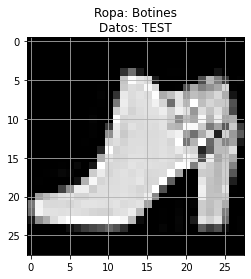

In [33]:
pf = 28
pc = 28

plot_image_sample(trainData, 9, 'train', pf, pc)
matrix_image_sample(trainData, 9, pf, pc)

# Muestra del Test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,1,0,0,0,0,0,76,39,6,0,0,0,17,109,88,2,12,63,0,0,0,0,0
1,0,0,0,0,0,4,0,120,160,134,178,250,198,213,195,171,249,211,205,213,205,192,190,80,0,4,0,0
2,0,0,0,0,0,6,0,101,213,186,168,170,176,186,196,194,195,196,160,167,167,171,161,112,0,8,0,0
3,0,0,0,0,0,6,0,83,195,190,166,191,164,190,178,166,142,153,164,170,163,161,179,83,0,8,0,0
4,0,0,0,0,0,5,0,49,180,161,184,195,209,192,171,174,173,189,228,210,175,172,184,70,0,8,0,0
5,0,0,0,0,0,0,0,0,119,201,209,234,197,190,198,195,205,238,201,189,187,173,90,0,0,0,0,0
6,0,0,0,0,0,0,1,0,16,186,187,187,190,196,147,192,182,168,130,151,172,163,0,0,3,2,0,0
7,0,0,0,0,0,0,1,0,42,215,186,164,128,170,156,209,179,170,144,187,183,195,24,0,2,2,0,0
8,0,0,1,0,0,0,5,0,56,181,183,167,174,153,170,182,211,150,191,195,164,166,55,0,3,0,0,0
9,0,0,1,0,0,0,0,0,111,187,166,120,151,160,164,172,142,160,152,176,157,163,72,0,6,0,0,0


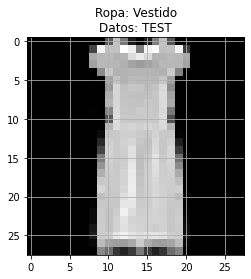

In [36]:
plot_image_sample(testData, 3, 'Test', pf, pc)
matrix_image_sample(testData, 3, pf, pc)

#5. PREPROCESAMIENTO DE LOS DATOS



In [38]:
import keras

def preprocesamiento(data, pf, pc):
    
    out_Y = keras.utils.to_categorical(data.label, len(labels))
    x_vect = data.values[:,1:-1]  #transformamos el dataFrame en un ndarray, seleccionando solo los píxeles
    x_scaled = x_vect / 255 # Dividimos por 255 por literatura (convergencia del gradiente, evita le colapso)
    n_img = data.shape[0]
    out_X = x_scaled.reshape(n_img, pf, pc, 1) # redimensionamos el vector a (1,784) a (28, 28, 1)  
    
    out_X = out_X.astype(float)
    out_Y = out_Y.astype(float)
    
    return out_X, out_Y

<u>__¿Qué es lo que hace ésta función?__</u>


Si somos un poco curosos, observamos que:

 1. Separamos la variable quantitativa `label` y la asociamos a la variable`out_Y`, la cual devolverá la _respuesta_. Destacar que la respuesta es ahora un vector, por ejemplo, si:
 
     * `label = 0` → `(1, 0, 0, 0, 0, 0, 0, 0, 0, 0)`
     * `label = 1` → `(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)`
     * $\vdots$              
     * `label = 9` → `(0, 0, 0, 0, 0, 0, 0, 0, 0, 1)`
     
 2. Seleccionamos solo las columnas referente a los píxeles, es decir, quitamos las varibles referentes a las etiquetas (`label` y `labelName`). El resultado lo asociamos a la variable `x_vect`.
 3. Procedemos a realizar el reescalado de los datos, cogiendo todo el vector y dividiéndola por 255. El resultado lo asociamos a la variable `x_scaled`.
 4. Redimensionamos cada una de las imágenes a (28, 28, 1), el formato ideal para introducirlo al modelo

In [39]:
x_train, y_train = preprocesamiento(trainData, pf, pc)
x_test, y_test = preprocesamiento(testData, pf, pc)

# Split del datset train para el entrenamiento del modelo

Normalmente lo que se hace es coger los datos train y dividir dicho set en dos, una parte para entrenar el modelo y otra parte para validarlo. Luego, se predice con los datos test original (no del train)

Es decir, del conjunto de datos total escogemos solo los datos de train y lo divididmos en 80% y 20%.

Existe una función en __sklearn__ que realiza dicho split del dataset automaticamente. Según la literatura (concretamente lo menciona __Aurélien Géron__ en el manual __Hand on machine learning with scikit-learn and tensorflow pdf__) el valor de la semilla (si se deseja fijar y mantener su reproducibilidad) se fija normalmente en el valor __42__.

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 42)

Unificamos el datatype del vector a un `float`

Ahora, por ejemplo, las distribución de las prendas de ropa es la siguiente:

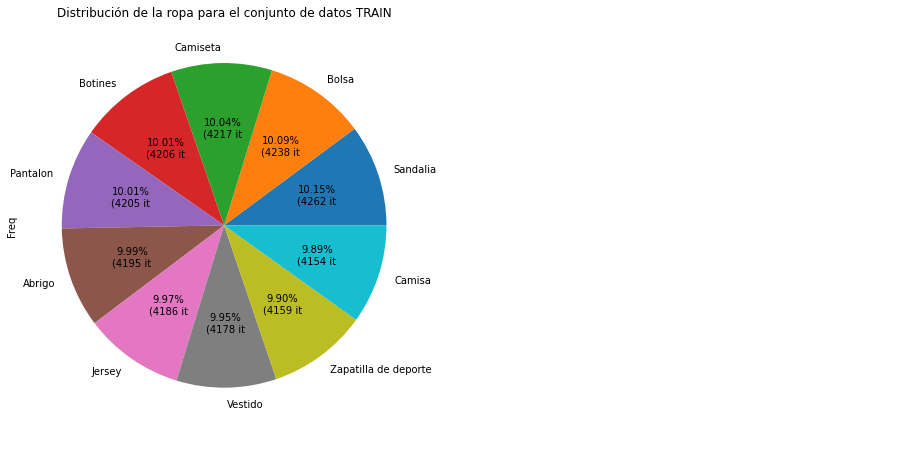

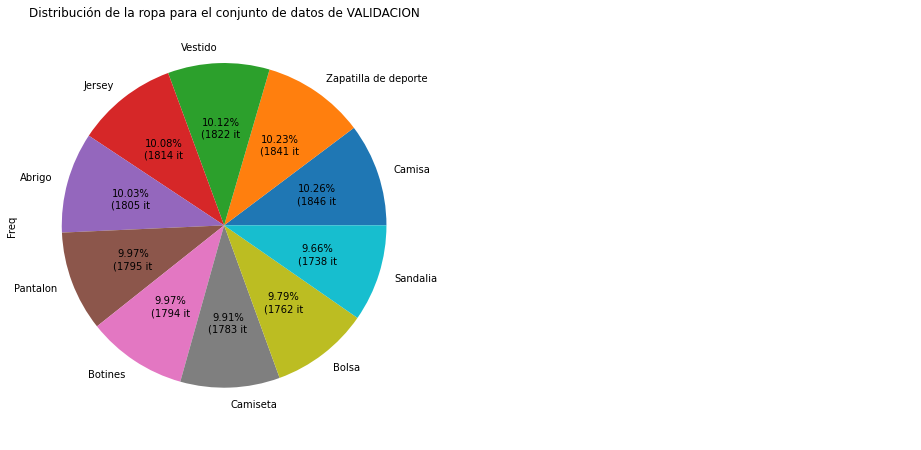

In [42]:
def proc_data_to_plot(data):

    freq = []
    for i in range(len(data)):
        freq.append(np.argmax(data[i]))
        
    return pd.DataFrame(freq, columns = ['Label'])
    
    
    
Train_labels_to_plot = proc_data_to_plot(Y_train) 
Val_labels_to_plot = proc_data_to_plot(Y_val) 

Train_labels_to_plot = add_column_from_dict(Train_labels_to_plot, 'Label', 'labelName', labels)
Val_labels_to_plot = add_column_from_dict(Val_labels_to_plot, 'Label', 'labelName', labels)


plot1 = pie_plot(Train_labels_to_plot,'Distribución de la ropa para el conjunto de datos TRAIN')
plot2 = pie_plot(Val_labels_to_plot, 'Distribución de la ropa para el conjunto de datos de VALIDACION')
plt.show()

# 6. MODELO

En python exisen varias maneras de implementar un modelo, en nuestro caso, usearemos el __secuencial__ (`model = Sequential()`). Este funciona añadiendo capas de código como se puede observar en el siguiente chunk.


## 6.1 Partes del Modelo

<a id="6.1.1"></a>
### 6.1.1 Modelo Parte 1
    
* __LeakyReLU__:  Definimos la funcion __LeakyReLU__ como funcion de activación. Esta función es más eficaz que la ReLU comunmente conocida.  
* __Capa convolucional 2D (Conv2D)__:
    * __Filtros__: Numero de filtros (kernels) utilizados en esta capa son 32
    * __kernel_size__: Dimmensión del Kernel: (3 x 3)
    * __activation__: Utilitzamos la función `LeakyReLU`
    * __kernel_initializer__: Función utilizada para inicializarel kernel: `he_normal`. Solo se utiliza en la primera capa. Esta [funcion](http://man.hubwiz.com/docset/TensorFlow.docset/Contents/Resources/Documents/api_docs/python/tf/keras/initializers/he_normal.html) se basa en muestras de una distribución normal truncada centrada en $0$ con $sd = \sqrt(\frac{2}{fan_{in}})$ donde $fan_{in}$ es el número de unidades de entrada en el tensor ("vector").
    * __input_shape__: Dimensión de la imagen presentada a la CNN: en nuestro caso es una imagen de 28 x 28. La entrada y salida del Conv2D es un tensor 4D.
* __MaxPooling2D__: La capa de reducción o pooling se coloca generalmente después de la capa convolucional. La función principal radica en la reducción de las dimensiones (anchura y altura) de entrada para la siguiente capa convolucional. Esto está muy bien, pero la reducción del volumen de datos conlleva intrínsecamente la pérdida de información, sin embargo, la reducción de la información puede ser algo baneficiós para la red por tres razones:
    
     * Reduce la sobrecarga de cálculos para las próximas capas de la red 
     * Reduce el overfitting (o el sobreajustmanet)
     * Favorece una computación ligera
  
  Sin alargarme más, en nuestro caso aplicamos un reduccion de (2, 2), reducimos 2 en $y$ y 2 en $x$
         
* __Dropout__: En redes neuronales profundas, tener una gran cantidad de parámetros hace que el overfitting tome un rol importante en las predicciones. El overfitting es un problema frecuente que requiere de técnicas para su regulación. Así pues, la técnica de regularización más popular para redes neuronales profundas es, sin duda, el __dropout__. La idea clave es que, en cada uno de los pasos del entrenamiento, desactive aleatoriamente neuronas (incluyendo las neuronas de entrada, pero excluyendo las neuronas de salida). Concretamente, cada neurona está determinada por una probabilidad $p$ de ser temporalmente abandonadas, lo que se llama en inglés neuronas en estado _dropped-out_. Esto significa que, las neuronas que pertenezcan en este estado serán totalmente ignoradas durante el entrenamiento. El hiperparamèmetre $p$ se denomina __tasa de abandono__ o __dropout rate__ y normalmente se sitúa en el 50%, es decir, $p$ = 0.5. Este valor $p$ es totalmente fluctuable y no se rigue por reglas concretas. 

  Pues en nuestro caso fijaremos este parametro en $p$ = 0.3

_Code:_

`model = Sequential()
LeakyReLU = lambda x: tf.keras.activations.relu(x, alpha=0.1)
model.add(Conv2D(32, 
                 kernel_size = (3, 3),
                 activation = LeakyReLU,
                 padding="same",
                 input_shape=(pf, pc, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3)`

                  
### 6.1.2 Modelo Parte 2
    

  
* __Capa convolucional 2D__:
    * __Filtros__: 64
    * __kernel_size__: (3 x 3)
    * __activation__: Utilitzamos la función `LeakyReLU`
    * __input_shape__: 28 x 28
* __MaxPooling2D__: (2, 2)
* __Dropout__: 0.5

_Code:_

`model.add(Conv2D(64, 
                  kernel_size = (3, 3),
                  activation = LeakyReLU,
                  input_shape=(pf, pc, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))`

### 6.1.3 Modelo Parte 3
    


* __Capa convolucional 2D__:
    * __Filtros__: 128
    * __kernel_size__: (3 x 3)
    * __activation__: Utilitzamos la función `LeakyReLU`
* __Flatten__: Esta capa aplana la entrada y Se usa sin parametros 
* __Dense__:
    * __unidades__: 128 (debe ser positivo)
    * __activation__: Utilitzamos la función `LeakyReLU`
.
* __Dropout__: 0.3
* __Dense - Fully Connected__: Esta es la capa final (completamente conectada). 
    * __unidades__: Numero de categorias a predecir, en nuestro caso, 10.
    * __activation__: `softmax` (estándar para la clasificación multiclase)


In [43]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D



#Parte 1 del modelo
model = Sequential()

LeakyReLU = lambda x: tf.keras.activations.relu(x, alpha=0.1)
model.add(Conv2D(32, 
                 kernel_size = (3, 3),
                 activation = LeakyReLU,
                 padding="same",
                 input_shape=(pf, pc, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))


#Parte 2 del modelo
model.add(Conv2D(64, 
                 kernel_size = (3, 3), 
                 activation = LeakyReLU,
                 padding="same"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))


#Parte 3 del modelo
model.add(Conv2D(128, (3, 3), activation = LeakyReLU))
model.add(Flatten())                               # Flatemos el tensor de pixeles:
model.add(Dense(128, activation = LeakyReLU))
model.add(Dropout(0.3))
model.add(Dense(n_cat, activation = 'softmax'))    # La ultima capa debe ser el nº de lables a predecir


Ahora que hemos definido como sera la red neuronal ahora, debemos elegir la __función de coste__, un __optimizador__ y las __métricas de rendimiento__, es decir, la __compilación__ del modelo.

En nuestero caso eligiremos lo siguiente:

* __FUNCIÓN DE COSTE__ --> `categorical_crossentrop`: Para un problema de clasificación como el nuestro que tiene 10 clases posibles etiquetas, necesitamos usar la función de pérdida llamada `categórica_crossentropy`. 
* __OPTIMIZADOR__ --> `adam`: Una de las partes más importantes del modelo es la elección del método de optimización. La elección del algoritmo de optimització23 marca la diferencia entre buenas y malas predicciones. En nuestro caso, hemos seleccionado el algoritmo de optimización *Adam*) (existen otros como  el stochastic gradiente descent (SGD), Mini-batch gradiente descent (MBGD), ...), el cual es extensión del SGD. Adam, según los autorses, es computacionalmente eficiente, necesita pocos requisitos de memoria y, además, es adecuado para grandes cantidades de datos.

* __MÉTRICA DE RENDIMIENTO__ --> `Accuracy`. Nos ayudará a validar el modelo

In [44]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = 'adam',
              metrics = ['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         7

In [46]:
batch = 70
epocas = 50
 
train_model = model.fit(X_train, Y_train,
                        batch_size = batch,
                        epochs = epocas,
                        verbose = 1,
                        validation_data = (X_val, Y_val))

Epoch 1/50
600/600 [==============================] - 86s 142ms/step - loss: 0.5980 - accuracy: 0.7781 - val_loss: 0.3731 - val_accuracy: 0.8621
Epoch 2/50
600/600 [==============================] - 82s 137ms/step - loss: 0.3888 - accuracy: 0.8584 - val_loss: 0.3159 - val_accuracy: 0.8863
Epoch 3/50
600/600 [==============================] - 80s 134ms/step - loss: 0.3417 - accuracy: 0.8756 - val_loss: 0.2848 - val_accuracy: 0.8959
Epoch 4/50
600/600 [==============================] - 80s 133ms/step - loss: 0.3117 - accuracy: 0.8846 - val_loss: 0.2676 - val_accuracy: 0.9048
Epoch 5/50
600/600 [==============================] - 83s 138ms/step - loss: 0.2923 - accuracy: 0.8939 - val_loss: 0.2516 - val_accuracy: 0.9085
Epoch 6/50
600/600 [==============================] - 84s 141ms/step - loss: 0.2762 - accuracy: 0.8983 - val_loss: 0.2505 - val_accuracy: 0.9099
Epoch 7/50
600/600 [==============================] - 80s 134ms/step - loss: 0.2651 - accuracy: 0.9019 - val_loss: 0.2510 - val_ac

#Evaluacion del modelo

In [48]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Perdida/Loss Test:', score[0])
print('Precision/Accuracy Test:', score[1])

Perdida/Loss Test: 0.2094968557357788
Precision/Accuracy Test: 0.930899977684021


In [49]:
import plotly.graph_objs as go

def interpolation_tracer(x, y, text, mode):
    fig.add_trace(go.Scatter(x = x, 
                             y = y, 
                             name = text,
                             mode = mode))
    fig.update_yaxes(range=[0,1])
    fig.update_xaxes(title_text = 'Épocas')
    fig.update_yaxes(title_text = 'Loss & Accuracy')
    
def layout_plot(Titulo):
    fig.update_layout(title = {'text': Titulo},
                      xaxis_title = "Accuracy",
                      yaxis_title = "Épocas",
                      legend_title = "Leyenda",
                      font = dict(family = "Courier New, monospace",
                                  size = 18,
                                  color = "RebeccaPurple"))
hist = train_model.history
acc = hist['accuracy']
val_acc = hist['val_accuracy']
loss = hist['loss']
val_loss = hist['val_loss']
epochs = list(range(1, len(acc) + 1))
    
fig = go.Figure()
interpolation_tracer(epochs, acc, 'Training accuracy', 'lines+markers')
interpolation_tracer(epochs, val_acc, 'Validation accuracy', 'lines+markers')
layout_plot('<b>Accuracy</b> entrenamiento y validación')
fig.show()

fig = go.Figure()
interpolation_tracer(epochs,loss,'Training loss', 'lines+markers')
interpolation_tracer(epochs,val_loss,'Validation loss', 'lines+markers')
layout_plot('<b>Loss</b> entrenamiento y validación')
fig.show()

# Predicciones en base al modelo

Ahora viene lo divertido, probar el modelo! Para ello, antes nos hemos reservado en conjunto de datos test. Con la función `predict_classes()` llevaremos a cabo esta tarea.

Vamos a realizar las predicciones:

In [50]:
pred = model.predict_classes(x_test)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



pero... realmente que es lo que deberia haber predicho?. Para saber que es lo que deberia haber predicho sacamos las etiquetas reales del conjunto de entrenamiento:

In [51]:
y_true = testData.iloc[:,0].to_numpy()

Comparamos las etiquetas predecidas con las reales (`pred[:10000] == y_true[:10000]`). Luego, sacamos aquellas que hayan hecho match, es decir, que has sido predecidas correctamente (` == True`). Con la función `np.where()` sacamos el valor de indice (posición) de la etiqueta para saber a que número se refiere y, finalmente, con `[0]` convertimos el resultado de `tupla` a `numpy.ndarray`.   

In [52]:
n = len(pred[:10000])

GoodPred = np.where((pred[:10000] == y_true[:10000]) == True)[0]
BadPred  = np.where((pred[:10000] == y_true[:10000]) == False)[0]

print('Se han predicho correctamente ' + str(GoodPred.shape[0]) + 
      ' clases de ' + str(n) + '.\tAcc: ' + str(round((GoodPred.shape[0]/n)*100, 2)) + '%')

print('Se han predicho erróneamente ' + str(BadPred.shape[0]) +
      ' clases de ' + str(n) + '.\tAcc: ' + str(round((BadPred.shape[0]/n)*100, 2)) + '%')

Se han predicho correctamente 9309 clases de 10000.	Acc: 93.09%
Se han predicho erróneamente 691 clases de 10000.	Acc: 6.91%


# Matriz de Confusión: Evaluación de las Predicciones


Una buena herramienta para visualizar sobre que objetos hemos predicho mal, es la matriz de confusión (o clasificación). Esta matriz muestra como ha clasificado el modelo cada cinjunto de prendas. 

In [53]:
from sklearn.metrics import confusion_matrix
import itertools

def Matriz_de_confusion(cm, clases,  normalize = False, title = 'Matriz de confusión', cmap = plt.cm.Oranges):
    
    plt.figure(figsize=(10 , 10) , dpi= 70)
    plt.imshow(cm , 
               interpolation = 'nearest' , 
               cmap = cmap ) 
    plt.suptitle(title, fontsize=20)
    tick_marks = np.arange(len(clases))
    plt.xticks(tick_marks, 
               clases,
               rotation = 45 )
    plt.yticks(tick_marks, 
               clases)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]) , range(cm.shape[1]) ):
        plt.text(j, i, format(cm[i, j] , fmt), 
        horizontalalignment = "center" ,
        color="white" if cm[ i, j] > thresh else "black" )
        
    plt.ylabel('Etiquetas reales')
    plt.xlabel('Etiquetas predichas') 

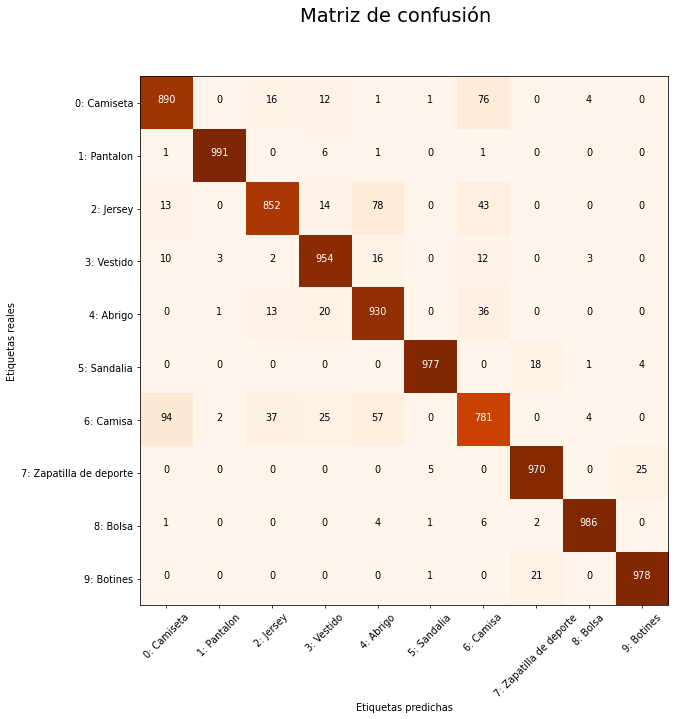

In [54]:
np.set_printoptions(precision = 2)
setLabels = [str(key) + str(': ') + labels[key] for key in labels]


Matriz_de_confusion(confusion_matrix(y_true, pred), 
                    clases = setLabels )

# CONCLUSIONES

Para resolver este complejo problema, hemos aplicado técnicas del Deep Learning para la predicción de artículos de ropa con imágenes. Hemos observado que lesprediccions hechas han sido bastante buenas, con un total de __9272__ predicciones correctas respecto __728__ erróneas. 

Concluimos que no ha existido overfitting ya que hemos aplicado técnicas de reducción de la dimensionalidad (MaxPooling2D), capas de regularización (Dropouts), 50 epocas, un batch size de 70 (no se ha estudiado). 


Finalmente, con el modelo entrenado, hemos comprobado que predice bastante bien dentro lo que cabe para la resolución de las imágenes. Para confirmar que nuestro modelo puede generalizar, hemos introducido datos nuevos al modelo y este los ha predicho bien. 

Confirmamos que el modelo es bueno obteniendo una precisión de ~ 0.927 para los datos test.

# REFERENCIAS

[1] Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Editio, Aurélien GéroN. [https://www.oreilly.com](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

[2] How to use Learning Curves to Diagnose Machine Learning Model Performance, Jason Brownlee. [https://machinelearningmastery.com](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)

[3] Activation Functions : Sigmoid, ReLU, Leaky ReLU and Softmax basics for Neural Networks and Deep Learning 
[https://medium.com](https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e)

[4] FASHION MNIST: Convolutional Neural Network (CNN)
[https:fashion-mnist-convolutional-neural-network-cnn/notebook](https://www.kaggle.com/code/oriolgilabertlpez/fashion-mnist-convolutional-neural-network-cnn/notebook)